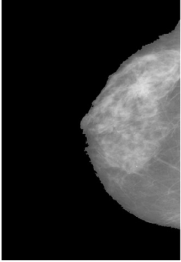

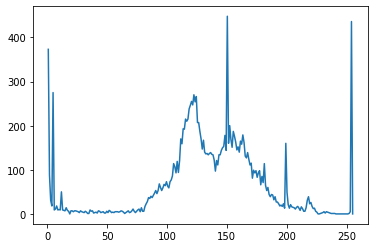

FINAL:
[12.602217144988934, 92.08659290565475, 137.82649246973085, 56.3359275472241, 180.95518507086314]
-6135165.599794943
FINAL:
[76.79844670992125, 188.66529897892116, 20.896280736609203, 115.09864865524743, 143.2248786236284]
-6136675.50013097
FINAL:
[255, 99.15006050249278, 36.41433539994937, 162.421947176206, 132.02098710794127]
-6137111.043879323
FINAL:
[20.12614042416393, 218.31896033125585, 255, 140.78337744130616, 82.85550356288104]
-6132585.448596956
FINAL:
[200.11165467999038, 58.220508250492365, 14.969440576603828, 104.2775123272197, 143.52980950367282]
-6136329.290056791
FINAL:
[149.86032211975004, 56.73114761422579, 82.76205602717673, 99.06800838950025, 12.781482005629648]
-6128912.832498601
FINAL:
[144.9386609179326, 1, 8.375426555086966, 36.591198097220754, 77.25192765473477]
-6125386.2834436465
FINAL:
[162.27926541602815, 28.795797958554388, 130.5132518528948, 92.5404473128698, 232.02360942678138]
-6135524.488033995
FINAL:
[22.971165184282405, 172.7589595611453, 134.9

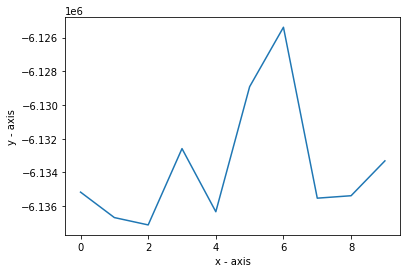

[180.95518507086314, 137.82649246973085, 92.08659290565475, 56.3359275472241, 12.602217144988934]


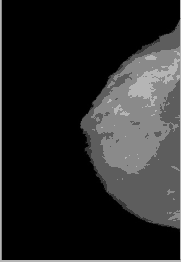

PSNR value for this image is 32.81589053658523
SSIM: 0.8960780939151449


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:249: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:

%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from operator import add
from google.colab.patches import cv2_imshow

image='1.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5
# print(h)

def dist(a,b):
    t = 0
    p = 0
    for i in range(0,nt):
        k1=a[i]*a[i]
        k2=b[i]*b[i]
        k=k1-k2
        k=abs(k)
        k=sqrt(k)
        t+=k
#     print(t)
    return t
        

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2

def func1(x):
	total=0
	for i in range(len(x)):
		total+=x[i]**2
	return total

def dist(a,b):
	val=0
	for i in range(len(a)):
		val=val+(a[i]-b[i])**2
	return val

class Particle:
	def __init__(self,x0):
		self.position_i=[]
		self.velocity_i=[]
		self.pos_best_i=[]
		self.err_best_i=-1
		self.err_i=-1

		for i in range(0,num_dimensions):
			self.velocity_i.append(random.uniform(-1,1))
			self.position_i.append(x0[i])

	def evaluate(self,costFunc):
		self.err_i=costFunc(self.position_i)

		if self.err_i < self.err_best_i or self.err_best_i==-1:
			self.pos_best_i=self.position_i
			self.err_best_i=self.err_i

	def update_velocity(self,pos_best_g):
		w=0.5
		c1=1
		c2=2

		for i in range(0,num_dimensions):
			r1=random.random()
			r2=random.random()

			vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
			vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
			self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

	def update_position(self,bounds):
		for i in range(0,num_dimensions):
			self.position_i[i]=self.position_i[i]+self.velocity_i[i]

			if self.position_i[i]>bounds[1][i]:
				self.position_i[i]=bounds[1][i]

			if self.position_i[i] < bounds[0][i]:
				self.position_i[i]=bounds[0][i]
				
class PSO():
  def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
    global num_dimensions

    probab= 0
    radius= 100
    num_dimensions=len(x0)
    err_best_g=-1
    pos_best_g=[]

    swarm=[]
    for i in range(0,num_particles):
      swarm.append(Particle(x0))

    i=0
    while i < maxiter:
      for j in range(0,num_particles):
        swarm[j].evaluate(costFunc)

        if swarm[j].err_i < err_best_g or err_best_g == -1:
          pos_best_g=list(swarm[j].position_i)
          err_best_g=float(swarm[j].err_i)

      for j in range(0,num_particles):
        pos=list(swarm[j].position_i)
        err=float(swarm[j].err_i)
        for k in range(0,num_particles):
          if dist(list(swarm[j].position_i),list(swarm[k].position_i))<=radius:
            if swarm[k].err_i<err:
              err=float(swarm[k].err_i)
              pos=list(swarm[k].position_i)
          else:
            if random.random()<=probab and swarm[k].err_i<err:
              err=float(swarm[k].err_i)
              pos=list(swarm[k].position_i)
        swarm[j].update_velocity(pos)
        swarm[j].update_position(bounds)
      i+=1
      probab=probab+1.0/maxiter
			#GA
      particles=[]			
      for j in range(0,num_particles):
        particles.append([swarm[j].err_i,j])
      particles.sort()
      j=particles[num_particles-1][1]
      i1=particles[0][1]
      i2=particles[1][1]
      swarm[j].position_i=map(add,swarm[i1].position_i,swarm[i2].position_i)
      swarm[j].position_i=[x/2.0 for x in swarm[j].position_i]
      swarm[j].velocity_i=map(add,swarm[i1].velocity_i,swarm[i2].velocity_i)
      swarm[j].velocity_i=[x/2.0 for x in swarm[j].velocity_i]
      swarm[j].err_best_i=-1
      swarm[j].evaluate(costFunc)
    print('FINAL:')
    print(pos_best_g)
    print(err_best_g)
    rr.append(pos_best_g)
    y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))


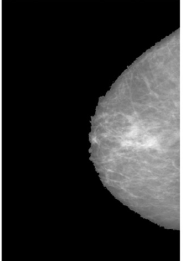

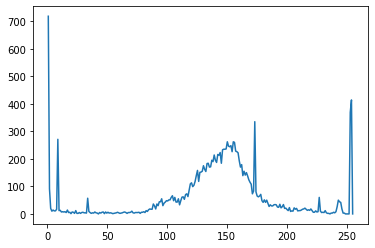

FINAL:
[242.46699214297425, 83.09169884745909, 123.68659183505082, 33.79196329110544, 157.5240108326248]
-6287516.594593735
FINAL:
[192.53942520812924, 141.1828065097329, 49.499696984875825, 201.1960887565572, 112.91440782733552]
-6282104.490157643
FINAL:
[129.98476341349166, 28.662474743859185, 84.9062750155829, 132.48323731905933, 207.53875434129765]
-6283659.743154587
FINAL:
[122.01079674026272, 13.157103876255265, 44.89020525746502, 58.22415292339019, 207.94268638902764]
-6281184.656133255
FINAL:
[147.17455447863475, 7.17781070057598, 100.03023001357656, 41.10647580207881, 240.18769378228396]
-6286112.247463705
FINAL:
[155.415011574764, 69.60209402307324, 15.595601855250528, 120.11105157032485, 237.42483164063015]
-6287986.175621437
FINAL:
[38.58104605631382, 5.142272376059514, 15.435705980515769, 132.6097916517153, 206.26611993429523]
-6281296.197999362
FINAL:
[86.78501386585282, 101.72568267013784, 138.57363074219106, 171.4254925044172, 254.51402259215905]
-6272784.459387453
FINA

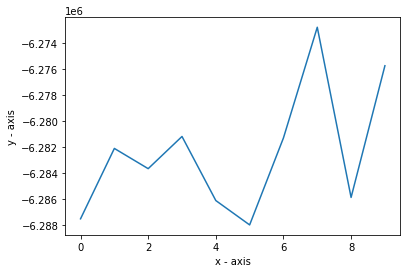

[242.46699214297425, 157.5240108326248, 123.68659183505082, 83.09169884745909, 33.79196329110544]


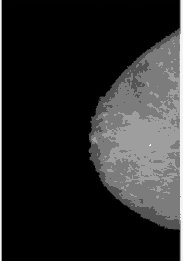

PSNR value for this image is 33.68049375622909
SSIM: 0.8981720169285966


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:249: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:

%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from operator import add
from google.colab.patches import cv2_imshow

image='2.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5
# print(h)

def dist(a,b):
    t = 0
    p = 0
    for i in range(0,nt):
        k1=a[i]*a[i]
        k2=b[i]*b[i]
        k=k1-k2
        k=abs(k)
        k=sqrt(k)
        t+=k
#     print(t)
    return t
        

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2

def func1(x):
	total=0
	for i in range(len(x)):
		total+=x[i]**2
	return total

def dist(a,b):
	val=0
	for i in range(len(a)):
		val=val+(a[i]-b[i])**2
	return val

class Particle:
	def __init__(self,x0):
		self.position_i=[]
		self.velocity_i=[]
		self.pos_best_i=[]
		self.err_best_i=-1
		self.err_i=-1

		for i in range(0,num_dimensions):
			self.velocity_i.append(random.uniform(-1,1))
			self.position_i.append(x0[i])

	def evaluate(self,costFunc):
		self.err_i=costFunc(self.position_i)

		if self.err_i < self.err_best_i or self.err_best_i==-1:
			self.pos_best_i=self.position_i
			self.err_best_i=self.err_i

	def update_velocity(self,pos_best_g):
		w=0.5
		c1=1
		c2=2

		for i in range(0,num_dimensions):
			r1=random.random()
			r2=random.random()

			vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
			vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
			self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

	def update_position(self,bounds):
		for i in range(0,num_dimensions):
			self.position_i[i]=self.position_i[i]+self.velocity_i[i]

			if self.position_i[i]>bounds[1][i]:
				self.position_i[i]=bounds[1][i]

			if self.position_i[i] < bounds[0][i]:
				self.position_i[i]=bounds[0][i]
				
class PSO():
  def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
    global num_dimensions

    probab= 0
    radius= 100
    num_dimensions=len(x0)
    err_best_g=-1
    pos_best_g=[]

    swarm=[]
    for i in range(0,num_particles):
      swarm.append(Particle(x0))

    i=0
    while i < maxiter:
      for j in range(0,num_particles):
        swarm[j].evaluate(costFunc)

        if swarm[j].err_i < err_best_g or err_best_g == -1:
          pos_best_g=list(swarm[j].position_i)
          err_best_g=float(swarm[j].err_i)

      for j in range(0,num_particles):
        pos=list(swarm[j].position_i)
        err=float(swarm[j].err_i)
        for k in range(0,num_particles):
          if dist(list(swarm[j].position_i),list(swarm[k].position_i))<=radius:
            if swarm[k].err_i<err:
              err=float(swarm[k].err_i)
              pos=list(swarm[k].position_i)
          else:
            if random.random()<=probab and swarm[k].err_i<err:
              err=float(swarm[k].err_i)
              pos=list(swarm[k].position_i)
        swarm[j].update_velocity(pos)
        swarm[j].update_position(bounds)
      i+=1
      probab=probab+1.0/maxiter
			#GA
      particles=[]			
      for j in range(0,num_particles):
        particles.append([swarm[j].err_i,j])
      particles.sort()
      j=particles[num_particles-1][1]
      i1=particles[0][1]
      i2=particles[1][1]
      swarm[j].position_i=map(add,swarm[i1].position_i,swarm[i2].position_i)
      swarm[j].position_i=[x/2.0 for x in swarm[j].position_i]
      swarm[j].velocity_i=map(add,swarm[i1].velocity_i,swarm[i2].velocity_i)
      swarm[j].velocity_i=[x/2.0 for x in swarm[j].velocity_i]
      swarm[j].err_best_i=-1
      swarm[j].evaluate(costFunc)
    print('FINAL:')
    print(pos_best_g)
    print(err_best_g)
    rr.append(pos_best_g)
    y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))


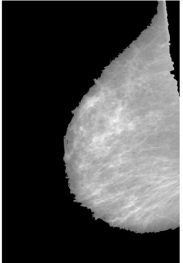

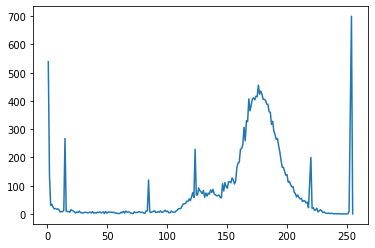

FINAL:
[254.5749061192559, 11.459467573121763, 197.401257990204, 99.03202656507155, 185.78695973431553]
-10412452.291848518
FINAL:
[9.517271422333597, 249.5857030008667, 179.01177934911433, 144.85551072728055, 74.98761019561172]
-10427923.077140074
FINAL:
[31.091811283913227, 108.15456954192987, 201.38041299562497, 254.68195591036067, 205.61702734960224]
-10409475.360104725
FINAL:
[143.7818095839722, 11.95411893917765, 62.69034365452495, 196.21755683813225, 118.47815449386049]
-10424771.747381873
FINAL:
[109.5075393208337, 35.01225283463242, 194.48339591155192, 165.38839312091844, 254.90385485393807]
-10425679.21091212
FINAL:
[161.9774620577121, 205.66077109903017, 111.72323214134802, 6.532990134844755, 52.98879785138982]
-10426845.7612365
FINAL:
[220.62469166408727, 104.40585966579266, 181.48059685092505, 148.50019454150205, 32.22778259583172]
-10426739.82523698
FINAL:
[113.12492801086161, 203.89830310259788, 158.85184359913686, 23.898414183093177, 64.72911273620704]
-10424691.4343353

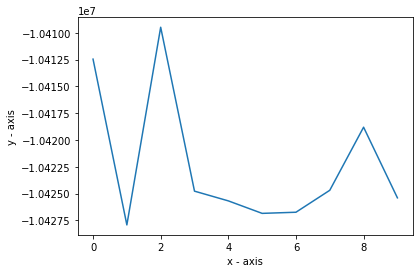

[211.52049703065367, 168.21375275879606, 141.50606229833818, 112.23741981020315, 34.769644240624885]


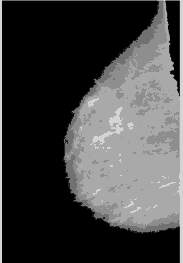

PSNR value for this image is 31.969039491857686
SSIM: 0.866833225910907


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:249: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:

%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from operator import add
from google.colab.patches import cv2_imshow

image='3.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5
# print(h)

def dist(a,b):
    t = 0
    p = 0
    for i in range(0,nt):
        k1=a[i]*a[i]
        k2=b[i]*b[i]
        k=k1-k2
        k=abs(k)
        k=sqrt(k)
        t+=k
#     print(t)
    return t
        

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2

def func1(x):
	total=0
	for i in range(len(x)):
		total+=x[i]**2
	return total

def dist(a,b):
	val=0
	for i in range(len(a)):
		val=val+(a[i]-b[i])**2
	return val

class Particle:
	def __init__(self,x0):
		self.position_i=[]
		self.velocity_i=[]
		self.pos_best_i=[]
		self.err_best_i=-1
		self.err_i=-1

		for i in range(0,num_dimensions):
			self.velocity_i.append(random.uniform(-1,1))
			self.position_i.append(x0[i])

	def evaluate(self,costFunc):
		self.err_i=costFunc(self.position_i)

		if self.err_i < self.err_best_i or self.err_best_i==-1:
			self.pos_best_i=self.position_i
			self.err_best_i=self.err_i

	def update_velocity(self,pos_best_g):
		w=0.5
		c1=1
		c2=2

		for i in range(0,num_dimensions):
			r1=random.random()
			r2=random.random()

			vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
			vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
			self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

	def update_position(self,bounds):
		for i in range(0,num_dimensions):
			self.position_i[i]=self.position_i[i]+self.velocity_i[i]

			if self.position_i[i]>bounds[1][i]:
				self.position_i[i]=bounds[1][i]

			if self.position_i[i] < bounds[0][i]:
				self.position_i[i]=bounds[0][i]
				
class PSO():
  def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
    global num_dimensions

    probab= 0
    radius= 100
    num_dimensions=len(x0)
    err_best_g=-1
    pos_best_g=[]

    swarm=[]
    for i in range(0,num_particles):
      swarm.append(Particle(x0))

    i=0
    while i < maxiter:
      for j in range(0,num_particles):
        swarm[j].evaluate(costFunc)

        if swarm[j].err_i < err_best_g or err_best_g == -1:
          pos_best_g=list(swarm[j].position_i)
          err_best_g=float(swarm[j].err_i)

      for j in range(0,num_particles):
        pos=list(swarm[j].position_i)
        err=float(swarm[j].err_i)
        for k in range(0,num_particles):
          if dist(list(swarm[j].position_i),list(swarm[k].position_i))<=radius:
            if swarm[k].err_i<err:
              err=float(swarm[k].err_i)
              pos=list(swarm[k].position_i)
          else:
            if random.random()<=probab and swarm[k].err_i<err:
              err=float(swarm[k].err_i)
              pos=list(swarm[k].position_i)
        swarm[j].update_velocity(pos)
        swarm[j].update_position(bounds)
      i+=1
      probab=probab+1.0/maxiter
			#GA
      particles=[]			
      for j in range(0,num_particles):
        particles.append([swarm[j].err_i,j])
      particles.sort()
      j=particles[num_particles-1][1]
      i1=particles[0][1]
      i2=particles[1][1]
      swarm[j].position_i=map(add,swarm[i1].position_i,swarm[i2].position_i)
      swarm[j].position_i=[x/2.0 for x in swarm[j].position_i]
      swarm[j].velocity_i=map(add,swarm[i1].velocity_i,swarm[i2].velocity_i)
      swarm[j].velocity_i=[x/2.0 for x in swarm[j].velocity_i]
      swarm[j].err_best_i=-1
      swarm[j].evaluate(costFunc)
    print('FINAL:')
    print(pos_best_g)
    print(err_best_g)
    rr.append(pos_best_g)
    y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))


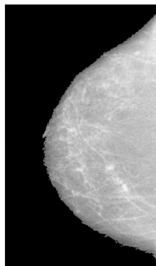

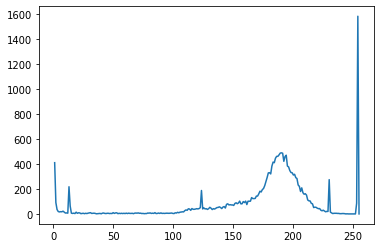

FINAL:
[151.0568653410925, 231.84405084751003, 98.19463060234477, 185.63508331366972, 29.544893872438042]
-11451777.837625356
FINAL:
[7.13296215274444, 176.37052176883725, 27.027609893599763, 95.22741161224606, 143.21782299743884]
-11441916.78117066
FINAL:
[181.19225755540887, 141.5199698850864, 236.21249689079883, 50.81853360307852, 253.94043661239178]
-11445550.855537592
FINAL:
[176.82041133585994, 254.64120409882412, 144.98871145986743, 17.098026827564148, 82.04479286488996]
-11451401.080059329
FINAL:
[175.7824983203396, 144.92488013370044, 29.275943796790102, 241.3853257712272, 102.94040087573148]
-11451040.507968964
FINAL:
[21.20432521325756, 112.18021760947843, 79.28643098256033, 246.0938663635149, 168.5469888923328]
-11448573.682421533
FINAL:
[189.58467667135866, 63.18123465695693, 250.05234338688533, 203.05459119681925, 170.84491247868033]
-11442830.523888806
FINAL:
[29.473772802484902, 146.3650861006637, 255, 102.28845959551141, 184.905307384809]
-11451615.081884017
FINAL:
[18

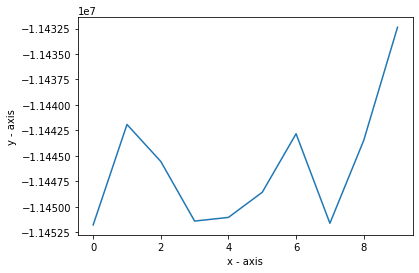

[231.84405084751003, 185.63508331366972, 151.0568653410925, 98.19463060234477, 29.544893872438042]


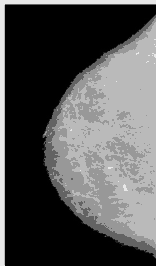

PSNR value for this image is 31.679492463010483
SSIM: 0.8349997846988481


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:249: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:

%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from operator import add
from google.colab.patches import cv2_imshow

image='4.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5
# print(h)

def dist(a,b):
    t = 0
    p = 0
    for i in range(0,nt):
        k1=a[i]*a[i]
        k2=b[i]*b[i]
        k=k1-k2
        k=abs(k)
        k=sqrt(k)
        t+=k
#     print(t)
    return t
        

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2

def func1(x):
	total=0
	for i in range(len(x)):
		total+=x[i]**2
	return total

def dist(a,b):
	val=0
	for i in range(len(a)):
		val=val+(a[i]-b[i])**2
	return val

class Particle:
	def __init__(self,x0):
		self.position_i=[]
		self.velocity_i=[]
		self.pos_best_i=[]
		self.err_best_i=-1
		self.err_i=-1

		for i in range(0,num_dimensions):
			self.velocity_i.append(random.uniform(-1,1))
			self.position_i.append(x0[i])

	def evaluate(self,costFunc):
		self.err_i=costFunc(self.position_i)

		if self.err_i < self.err_best_i or self.err_best_i==-1:
			self.pos_best_i=self.position_i
			self.err_best_i=self.err_i

	def update_velocity(self,pos_best_g):
		w=0.5
		c1=1
		c2=2

		for i in range(0,num_dimensions):
			r1=random.random()
			r2=random.random()

			vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
			vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
			self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

	def update_position(self,bounds):
		for i in range(0,num_dimensions):
			self.position_i[i]=self.position_i[i]+self.velocity_i[i]

			if self.position_i[i]>bounds[1][i]:
				self.position_i[i]=bounds[1][i]

			if self.position_i[i] < bounds[0][i]:
				self.position_i[i]=bounds[0][i]
				
class PSO():
  def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
    global num_dimensions

    probab= 0
    radius= 100
    num_dimensions=len(x0)
    err_best_g=-1
    pos_best_g=[]

    swarm=[]
    for i in range(0,num_particles):
      swarm.append(Particle(x0))

    i=0
    while i < maxiter:
      for j in range(0,num_particles):
        swarm[j].evaluate(costFunc)

        if swarm[j].err_i < err_best_g or err_best_g == -1:
          pos_best_g=list(swarm[j].position_i)
          err_best_g=float(swarm[j].err_i)

      for j in range(0,num_particles):
        pos=list(swarm[j].position_i)
        err=float(swarm[j].err_i)
        for k in range(0,num_particles):
          if dist(list(swarm[j].position_i),list(swarm[k].position_i))<=radius:
            if swarm[k].err_i<err:
              err=float(swarm[k].err_i)
              pos=list(swarm[k].position_i)
          else:
            if random.random()<=probab and swarm[k].err_i<err:
              err=float(swarm[k].err_i)
              pos=list(swarm[k].position_i)
        swarm[j].update_velocity(pos)
        swarm[j].update_position(bounds)
      i+=1
      probab=probab+1.0/maxiter
			#GA
      particles=[]			
      for j in range(0,num_particles):
        particles.append([swarm[j].err_i,j])
      particles.sort()
      j=particles[num_particles-1][1]
      i1=particles[0][1]
      i2=particles[1][1]
      swarm[j].position_i=map(add,swarm[i1].position_i,swarm[i2].position_i)
      swarm[j].position_i=[x/2.0 for x in swarm[j].position_i]
      swarm[j].velocity_i=map(add,swarm[i1].velocity_i,swarm[i2].velocity_i)
      swarm[j].velocity_i=[x/2.0 for x in swarm[j].velocity_i]
      swarm[j].err_best_i=-1
      swarm[j].evaluate(costFunc)
    print('FINAL:')
    print(pos_best_g)
    print(err_best_g)
    rr.append(pos_best_g)
    y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))


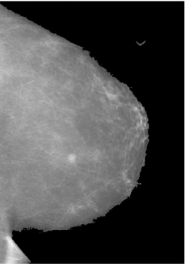

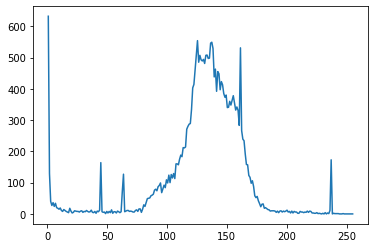

FINAL:
[136.04642395635608, 235.15516709321366, 26.86328893187917, 63.1148319455895, 94.12349535688534]
-9987601.909052871
FINAL:
[69.67486251566423, 14.830215668885852, 42.22773357617191, 73.03811020928497, 135.50152396970802]
-9982713.092925727
FINAL:
[67.72507526835194, 193.61049565825058, 76.1925343345895, 74.68213089524563, 28.919812098960847]
-9957649.858931582
FINAL:
[214.7525707472367, 242.5999625521302, 122.24331857359962, 42.52734499698612, 255]
-9968247.473434072
FINAL:
[121.5537471654577, 223.0121998372411, 42.00255438193266, 237.15165803273823, 195.37429393323725]
-9968852.512124166
FINAL:
[124.0972608592079, 61.979911156593765, 100.35564531318059, 246.59592311594264, 144.02248481827408]
-9977982.579378568
FINAL:
[110.2459584954016, 12.398433863692743, 143.59826814474505, 237.70038956309182, 52.398075294777726]
-9990171.428494845
FINAL:
[36.324477369748344, 101.05647652326431, 138.0111630111233, 217.74048604220275, 253.10488265379672]
-9982667.731286079
FINAL:
[203.3674859

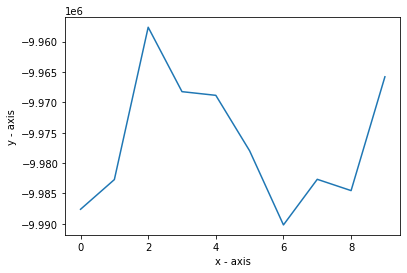

[235.15516709321366, 136.04642395635608, 94.12349535688534, 63.1148319455895, 26.86328893187917]


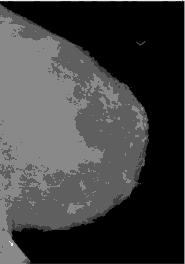

PSNR value for this image is 30.882355962007026
SSIM: 0.8096068785654983


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:249: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:

%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from operator import add
from google.colab.patches import cv2_imshow

image='5.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5
# print(h)

def dist(a,b):
    t = 0
    p = 0
    for i in range(0,nt):
        k1=a[i]*a[i]
        k2=b[i]*b[i]
        k=k1-k2
        k=abs(k)
        k=sqrt(k)
        t+=k
#     print(t)
    return t
        

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2

def func1(x):
	total=0
	for i in range(len(x)):
		total+=x[i]**2
	return total

def dist(a,b):
	val=0
	for i in range(len(a)):
		val=val+(a[i]-b[i])**2
	return val

class Particle:
	def __init__(self,x0):
		self.position_i=[]
		self.velocity_i=[]
		self.pos_best_i=[]
		self.err_best_i=-1
		self.err_i=-1

		for i in range(0,num_dimensions):
			self.velocity_i.append(random.uniform(-1,1))
			self.position_i.append(x0[i])

	def evaluate(self,costFunc):
		self.err_i=costFunc(self.position_i)

		if self.err_i < self.err_best_i or self.err_best_i==-1:
			self.pos_best_i=self.position_i
			self.err_best_i=self.err_i

	def update_velocity(self,pos_best_g):
		w=0.5
		c1=1
		c2=2

		for i in range(0,num_dimensions):
			r1=random.random()
			r2=random.random()

			vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
			vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
			self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

	def update_position(self,bounds):
		for i in range(0,num_dimensions):
			self.position_i[i]=self.position_i[i]+self.velocity_i[i]

			if self.position_i[i]>bounds[1][i]:
				self.position_i[i]=bounds[1][i]

			if self.position_i[i] < bounds[0][i]:
				self.position_i[i]=bounds[0][i]
				
class PSO():
  def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
    global num_dimensions

    probab= 0
    radius= 100
    num_dimensions=len(x0)
    err_best_g=-1
    pos_best_g=[]

    swarm=[]
    for i in range(0,num_particles):
      swarm.append(Particle(x0))

    i=0
    while i < maxiter:
      for j in range(0,num_particles):
        swarm[j].evaluate(costFunc)

        if swarm[j].err_i < err_best_g or err_best_g == -1:
          pos_best_g=list(swarm[j].position_i)
          err_best_g=float(swarm[j].err_i)

      for j in range(0,num_particles):
        pos=list(swarm[j].position_i)
        err=float(swarm[j].err_i)
        for k in range(0,num_particles):
          if dist(list(swarm[j].position_i),list(swarm[k].position_i))<=radius:
            if swarm[k].err_i<err:
              err=float(swarm[k].err_i)
              pos=list(swarm[k].position_i)
          else:
            if random.random()<=probab and swarm[k].err_i<err:
              err=float(swarm[k].err_i)
              pos=list(swarm[k].position_i)
        swarm[j].update_velocity(pos)
        swarm[j].update_position(bounds)
      i+=1
      probab=probab+1.0/maxiter
			#GA
      particles=[]			
      for j in range(0,num_particles):
        particles.append([swarm[j].err_i,j])
      particles.sort()
      j=particles[num_particles-1][1]
      i1=particles[0][1]
      i2=particles[1][1]
      swarm[j].position_i=map(add,swarm[i1].position_i,swarm[i2].position_i)
      swarm[j].position_i=[x/2.0 for x in swarm[j].position_i]
      swarm[j].velocity_i=map(add,swarm[i1].velocity_i,swarm[i2].velocity_i)
      swarm[j].velocity_i=[x/2.0 for x in swarm[j].velocity_i]
      swarm[j].err_best_i=-1
      swarm[j].evaluate(costFunc)
    print('FINAL:')
    print(pos_best_g)
    print(err_best_g)
    rr.append(pos_best_g)
    y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))


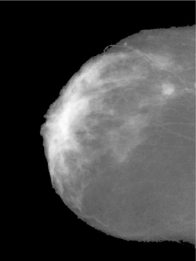

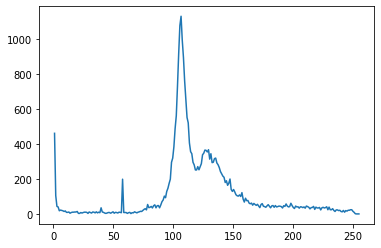

FINAL:
[249.48395850732342, 201.78780804876286, 2.383949013620413, 127.01658873260959, 68.79039153793245]
-9552866.450047687
FINAL:
[125.8588141817294, 222.92049417528077, 201.224910850729, 35.42988726290052, 45.064194802523275]
-9551852.60331719
FINAL:
[79.5745054637861, 122.93764492892163, 143.17781702566046, 23.49053965949666, 225.3914096673244]
-9563000.641424835
FINAL:
[119.86290779670622, 153.78965096673278, 202.4916910402813, 46.49920379714318, 219.28955390784216]
-9557490.791163903
FINAL:
[29.946132709769937, 238.09397406717142, 133.77504463738495, 86.53236055021529, 214.9866227639097]
-9555548.048800588
FINAL:
[115.53353782059094, 167.70126258340628, 208.50841019560133, 141.8661519506346, 46.23252408100352]
-9559582.637015097
FINAL:
[173.93452130127275, 207.88317312149096, 79.2662590507419, 23.892282106331287, 123.10316135246613]
-9566264.515111454
FINAL:
[168.47347798797003, 57.25480238771893, 47.42010180193891, 11.189015099983642, 119.6501569621927]
-9561774.232773859
FINAL:

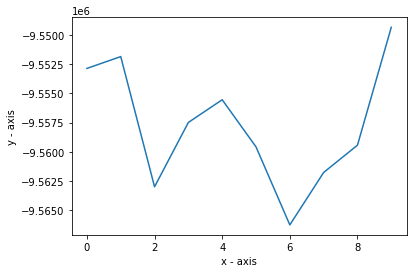

[249.48395850732342, 201.78780804876286, 127.01658873260959, 68.79039153793245, 2.383949013620413]


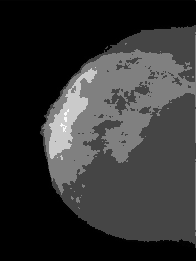

PSNR value for this image is 30.38653294430063
SSIM: 0.7842923779215553


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:249: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [6]:

%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from operator import add
from google.colab.patches import cv2_imshow

image='6.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5
# print(h)

def dist(a,b):
    t = 0
    p = 0
    for i in range(0,nt):
        k1=a[i]*a[i]
        k2=b[i]*b[i]
        k=k1-k2
        k=abs(k)
        k=sqrt(k)
        t+=k
#     print(t)
    return t
        

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2

def func1(x):
	total=0
	for i in range(len(x)):
		total+=x[i]**2
	return total

def dist(a,b):
	val=0
	for i in range(len(a)):
		val=val+(a[i]-b[i])**2
	return val

class Particle:
	def __init__(self,x0):
		self.position_i=[]
		self.velocity_i=[]
		self.pos_best_i=[]
		self.err_best_i=-1
		self.err_i=-1

		for i in range(0,num_dimensions):
			self.velocity_i.append(random.uniform(-1,1))
			self.position_i.append(x0[i])

	def evaluate(self,costFunc):
		self.err_i=costFunc(self.position_i)

		if self.err_i < self.err_best_i or self.err_best_i==-1:
			self.pos_best_i=self.position_i
			self.err_best_i=self.err_i

	def update_velocity(self,pos_best_g):
		w=0.5
		c1=1
		c2=2

		for i in range(0,num_dimensions):
			r1=random.random()
			r2=random.random()

			vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
			vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
			self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

	def update_position(self,bounds):
		for i in range(0,num_dimensions):
			self.position_i[i]=self.position_i[i]+self.velocity_i[i]

			if self.position_i[i]>bounds[1][i]:
				self.position_i[i]=bounds[1][i]

			if self.position_i[i] < bounds[0][i]:
				self.position_i[i]=bounds[0][i]
				
class PSO():
  def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
    global num_dimensions

    probab= 0
    radius= 100
    num_dimensions=len(x0)
    err_best_g=-1
    pos_best_g=[]

    swarm=[]
    for i in range(0,num_particles):
      swarm.append(Particle(x0))

    i=0
    while i < maxiter:
      for j in range(0,num_particles):
        swarm[j].evaluate(costFunc)

        if swarm[j].err_i < err_best_g or err_best_g == -1:
          pos_best_g=list(swarm[j].position_i)
          err_best_g=float(swarm[j].err_i)

      for j in range(0,num_particles):
        pos=list(swarm[j].position_i)
        err=float(swarm[j].err_i)
        for k in range(0,num_particles):
          if dist(list(swarm[j].position_i),list(swarm[k].position_i))<=radius:
            if swarm[k].err_i<err:
              err=float(swarm[k].err_i)
              pos=list(swarm[k].position_i)
          else:
            if random.random()<=probab and swarm[k].err_i<err:
              err=float(swarm[k].err_i)
              pos=list(swarm[k].position_i)
        swarm[j].update_velocity(pos)
        swarm[j].update_position(bounds)
      i+=1
      probab=probab+1.0/maxiter
			#GA
      particles=[]			
      for j in range(0,num_particles):
        particles.append([swarm[j].err_i,j])
      particles.sort()
      j=particles[num_particles-1][1]
      i1=particles[0][1]
      i2=particles[1][1]
      swarm[j].position_i=map(add,swarm[i1].position_i,swarm[i2].position_i)
      swarm[j].position_i=[x/2.0 for x in swarm[j].position_i]
      swarm[j].velocity_i=map(add,swarm[i1].velocity_i,swarm[i2].velocity_i)
      swarm[j].velocity_i=[x/2.0 for x in swarm[j].velocity_i]
      swarm[j].err_best_i=-1
      swarm[j].evaluate(costFunc)
    print('FINAL:')
    print(pos_best_g)
    print(err_best_g)
    rr.append(pos_best_g)
    y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))


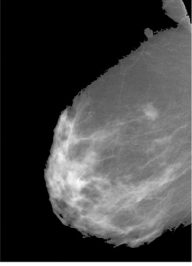

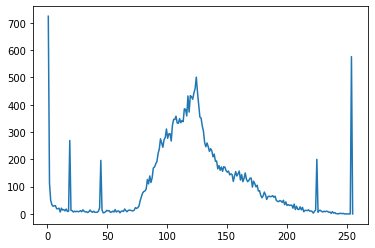

FINAL:
[194.80391066341502, 217.93939116210865, 140.1924477330097, 122.93386443833714, 45.516868985472875]
-9450447.88813686
FINAL:
[1, 136.65879940068575, 255, 51.4626170492713, 255]
-9434476.835048273
FINAL:
[6.0819831816721965, 146.50699176570149, 39.02773818954669, 220.90792137028984, 107.12594086127157]
-9460828.737660892
FINAL:
[152.70476602516078, 192.87227728176433, 137.3533401626587, 18.228539058379553, 170.63253498216062]
-9422825.246315863
FINAL:
[32.35207888940069, 102.94842647204177, 135.84030542323572, 174.0007237308365, 9.555550466501408]
-9460033.73040988
FINAL:
[150.32010804991438, 113.82807450728421, 65.31408196890614, 241.0742382487324, 11.441193873505908]
-9463683.561648015
FINAL:
[224.40742850460794, 145.1031151311525, 233.38712344086363, 106.99715016410855, 37.34432278260023]
-9453980.247818258
FINAL:
[133.13628698488046, 49.011846965359375, 212.8587264881912, 8.828515693719392, 36.4334556166103]
-9451468.826417685
FINAL:
[148.36306947608102, 43.69267393759541, 25

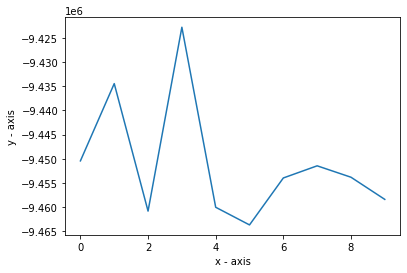

[254.86448829262042, 171.9577269129554, 120.4146937866061, 62.25013426325441, 3.344034372275754]


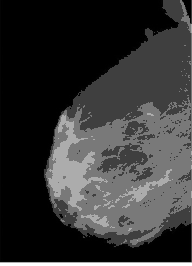

PSNR value for this image is 30.82015188565318
SSIM: 0.7774402332436418


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:249: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [7]:

%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from operator import add
from google.colab.patches import cv2_imshow

image='7.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5
# print(h)

def dist(a,b):
    t = 0
    p = 0
    for i in range(0,nt):
        k1=a[i]*a[i]
        k2=b[i]*b[i]
        k=k1-k2
        k=abs(k)
        k=sqrt(k)
        t+=k
#     print(t)
    return t
        

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2

def func1(x):
	total=0
	for i in range(len(x)):
		total+=x[i]**2
	return total

def dist(a,b):
	val=0
	for i in range(len(a)):
		val=val+(a[i]-b[i])**2
	return val

class Particle:
	def __init__(self,x0):
		self.position_i=[]
		self.velocity_i=[]
		self.pos_best_i=[]
		self.err_best_i=-1
		self.err_i=-1

		for i in range(0,num_dimensions):
			self.velocity_i.append(random.uniform(-1,1))
			self.position_i.append(x0[i])

	def evaluate(self,costFunc):
		self.err_i=costFunc(self.position_i)

		if self.err_i < self.err_best_i or self.err_best_i==-1:
			self.pos_best_i=self.position_i
			self.err_best_i=self.err_i

	def update_velocity(self,pos_best_g):
		w=0.5
		c1=1
		c2=2

		for i in range(0,num_dimensions):
			r1=random.random()
			r2=random.random()

			vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
			vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
			self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

	def update_position(self,bounds):
		for i in range(0,num_dimensions):
			self.position_i[i]=self.position_i[i]+self.velocity_i[i]

			if self.position_i[i]>bounds[1][i]:
				self.position_i[i]=bounds[1][i]

			if self.position_i[i] < bounds[0][i]:
				self.position_i[i]=bounds[0][i]
				
class PSO():
  def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
    global num_dimensions

    probab= 0
    radius= 100
    num_dimensions=len(x0)
    err_best_g=-1
    pos_best_g=[]

    swarm=[]
    for i in range(0,num_particles):
      swarm.append(Particle(x0))

    i=0
    while i < maxiter:
      for j in range(0,num_particles):
        swarm[j].evaluate(costFunc)

        if swarm[j].err_i < err_best_g or err_best_g == -1:
          pos_best_g=list(swarm[j].position_i)
          err_best_g=float(swarm[j].err_i)

      for j in range(0,num_particles):
        pos=list(swarm[j].position_i)
        err=float(swarm[j].err_i)
        for k in range(0,num_particles):
          if dist(list(swarm[j].position_i),list(swarm[k].position_i))<=radius:
            if swarm[k].err_i<err:
              err=float(swarm[k].err_i)
              pos=list(swarm[k].position_i)
          else:
            if random.random()<=probab and swarm[k].err_i<err:
              err=float(swarm[k].err_i)
              pos=list(swarm[k].position_i)
        swarm[j].update_velocity(pos)
        swarm[j].update_position(bounds)
      i+=1
      probab=probab+1.0/maxiter
			#GA
      particles=[]			
      for j in range(0,num_particles):
        particles.append([swarm[j].err_i,j])
      particles.sort()
      j=particles[num_particles-1][1]
      i1=particles[0][1]
      i2=particles[1][1]
      swarm[j].position_i=map(add,swarm[i1].position_i,swarm[i2].position_i)
      swarm[j].position_i=[x/2.0 for x in swarm[j].position_i]
      swarm[j].velocity_i=map(add,swarm[i1].velocity_i,swarm[i2].velocity_i)
      swarm[j].velocity_i=[x/2.0 for x in swarm[j].velocity_i]
      swarm[j].err_best_i=-1
      swarm[j].evaluate(costFunc)
    print('FINAL:')
    print(pos_best_g)
    print(err_best_g)
    rr.append(pos_best_g)
    y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))


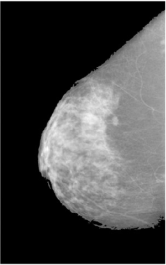

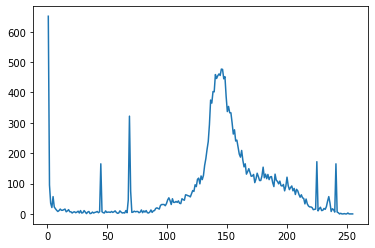

FINAL:
[156.90115210818956, 87.67936042539371, 129.6917809923811, 14.165909241162, 187.0015189364126]
-8994281.29614916
FINAL:
[13.253268072180628, 127.16746991683944, 152.10731371663698, 92.24336765908, 52.0673692956101]
-8987862.75548603
FINAL:
[95.19461479767021, 60.95896497272675, 183.83809517867468, 127.11159883816305, 151.20202373324528]
-8984710.440669935
FINAL:
[125.8378729696153, 169.9547614545522, 229.50833579069086, 234.5957962529555, 38.000052437200644]
-8982891.53441713
FINAL:
[23.99471790981999, 143.12205101563436, 223.6274752218258, 118.37493801795219, 87.91155543553305]
-8983364.75901325
FINAL:
[81.32773523483783, 161.31058392223173, 197.70859725882426, 129.8960881343441, 22.992004831823838]
-8994366.482920919
FINAL:
[104.18831075092224, 221.95590988479015, 164.60007965717583, 72.77300719046889, 80.66853278297123]
-8962070.790156793
FINAL:
[148.9674967763757, 180.50331799209974, 96.61105471381778, 16.59543689370917, 26.671175798293017]
-8991458.154179256
FINAL:
[249.488

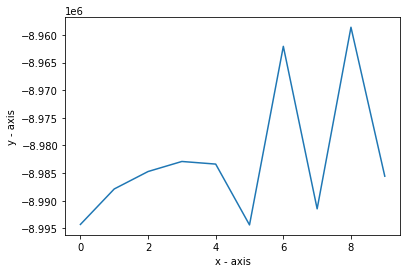

[187.0015189364126, 156.90115210818956, 129.6917809923811, 87.67936042539371, 14.165909241162]


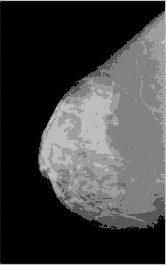

PSNR value for this image is 31.62682955825759
SSIM: 0.8671101245410535


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:249: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [8]:

%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from operator import add
from google.colab.patches import cv2_imshow

image='8.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5
# print(h)

def dist(a,b):
    t = 0
    p = 0
    for i in range(0,nt):
        k1=a[i]*a[i]
        k2=b[i]*b[i]
        k=k1-k2
        k=abs(k)
        k=sqrt(k)
        t+=k
#     print(t)
    return t
        

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2

def func1(x):
	total=0
	for i in range(len(x)):
		total+=x[i]**2
	return total

def dist(a,b):
	val=0
	for i in range(len(a)):
		val=val+(a[i]-b[i])**2
	return val

class Particle:
	def __init__(self,x0):
		self.position_i=[]
		self.velocity_i=[]
		self.pos_best_i=[]
		self.err_best_i=-1
		self.err_i=-1

		for i in range(0,num_dimensions):
			self.velocity_i.append(random.uniform(-1,1))
			self.position_i.append(x0[i])

	def evaluate(self,costFunc):
		self.err_i=costFunc(self.position_i)

		if self.err_i < self.err_best_i or self.err_best_i==-1:
			self.pos_best_i=self.position_i
			self.err_best_i=self.err_i

	def update_velocity(self,pos_best_g):
		w=0.5
		c1=1
		c2=2

		for i in range(0,num_dimensions):
			r1=random.random()
			r2=random.random()

			vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
			vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
			self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

	def update_position(self,bounds):
		for i in range(0,num_dimensions):
			self.position_i[i]=self.position_i[i]+self.velocity_i[i]

			if self.position_i[i]>bounds[1][i]:
				self.position_i[i]=bounds[1][i]

			if self.position_i[i] < bounds[0][i]:
				self.position_i[i]=bounds[0][i]
				
class PSO():
  def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
    global num_dimensions

    probab= 0
    radius= 100
    num_dimensions=len(x0)
    err_best_g=-1
    pos_best_g=[]

    swarm=[]
    for i in range(0,num_particles):
      swarm.append(Particle(x0))

    i=0
    while i < maxiter:
      for j in range(0,num_particles):
        swarm[j].evaluate(costFunc)

        if swarm[j].err_i < err_best_g or err_best_g == -1:
          pos_best_g=list(swarm[j].position_i)
          err_best_g=float(swarm[j].err_i)

      for j in range(0,num_particles):
        pos=list(swarm[j].position_i)
        err=float(swarm[j].err_i)
        for k in range(0,num_particles):
          if dist(list(swarm[j].position_i),list(swarm[k].position_i))<=radius:
            if swarm[k].err_i<err:
              err=float(swarm[k].err_i)
              pos=list(swarm[k].position_i)
          else:
            if random.random()<=probab and swarm[k].err_i<err:
              err=float(swarm[k].err_i)
              pos=list(swarm[k].position_i)
        swarm[j].update_velocity(pos)
        swarm[j].update_position(bounds)
      i+=1
      probab=probab+1.0/maxiter
			#GA
      particles=[]			
      for j in range(0,num_particles):
        particles.append([swarm[j].err_i,j])
      particles.sort()
      j=particles[num_particles-1][1]
      i1=particles[0][1]
      i2=particles[1][1]
      swarm[j].position_i=map(add,swarm[i1].position_i,swarm[i2].position_i)
      swarm[j].position_i=[x/2.0 for x in swarm[j].position_i]
      swarm[j].velocity_i=map(add,swarm[i1].velocity_i,swarm[i2].velocity_i)
      swarm[j].velocity_i=[x/2.0 for x in swarm[j].velocity_i]
      swarm[j].err_best_i=-1
      swarm[j].evaluate(costFunc)
    print('FINAL:')
    print(pos_best_g)
    print(err_best_g)
    rr.append(pos_best_g)
    y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))
